# Criando o algoritmo genetico

In [2]:
import random
import numpy as np

In [3]:
class AlgoritmoGenetico:
    ''' Algoritmo genetico simples. '''

    def __init__(self, funcao_de_fitness, formato: list, tamanho_populacao: int=100, 
                 chance_de_mutacao: float=.1, chance_de_cruzamento: float=.5, 
                 quantidade_melhores: int=10, quantidade_de_geracoes: int=100,
                 minimizar_funcao_de_fitness: bool=True) -> None:
        '''
            Parametros:  
                tamanho_populacao: Tamanho da população que sera utilizado pelo algoritmo.
                formato: formato Definindo os limites e o numero de parametros dos individuos, exemplos:
                    formato = [[0, 255], [0, 255], [0, 255]], seria um individuo com 3 parametros cujo os valores variam de 0 a 255.  
                    formato = [[-10, 10]], seria um individuo com 1 parametro cujo os valores variam de -10 a 10.  
                chance_de_mutacao: Valor de 0 a 1, chance de mutação de um peso qualquer.  
                chance_de_cruzamento: Valor de 0 a 1, chance de cruzamento de um individuo com outro.  
                funcao_de_fitness: Função de fitness que sera utilizada pelo modelo.  
                quantidade_melhores: Quantidade de individuos de geração atual que seram selecionados para a proxima geração.  
                quantidade_de_geracoes: Quantidade de gerações que seram geradas.  
                minimizar_funcao_de_fitness: Quando True os individuos com o menor valor quando 
                    avaliados pela função funcao_de_fitness são considerados melhores, quando False os
                    os individuos com o maior valor quando avaliados pela função funcao_de_fitness são considerados melhores
        '''
        
        self._tamanho_populacao = tamanho_populacao
        self._funcao_de_fitness = funcao_de_fitness
        self._chance_de_mutacao = chance_de_mutacao
        self._chance_de_cruzamento = chance_de_cruzamento
        self._quantidade_melhores = quantidade_melhores
        self._quantidade_de_geracoes = quantidade_de_geracoes
        self._minimizar_funcao_de_fitness = minimizar_funcao_de_fitness
        self._formato = formato


    def rodar(self) -> list:
        ''' Executa o algoritmo e retorna o resultado do melhor individuo '''
        
        self._gera_populacao_aleatoria()
        for _ in range(self._quantidade_de_geracoes):
            self._selecao_e_reproducao()
        
        return self._populacao_ordenada_pela_aptidao()[0]


    def _gera_populacao_aleatoria(self) -> None:
        ''' Gera uma população aleatoria. '''
        self._populacao = [
                [random.randint(f[0], f[1]) for f in self._formato] 
                for _ in range(self._tamanho_populacao)
        ]


    def _populacao_ordenada_pela_aptidao(self) -> list:
        ''' Retorna a populacao ordenada pela aptidao, calculada apartir da função de fitness. '''
        # executa a funcao de fitness para todos os individuos da populacao
        aptidao_de_cada_individuo = [
                   {'aptidao': self._funcao_de_fitness(individuo),
                    'individuo': individuo} 
                   for individuo in self._populacao
        ]
        
        # ordenando a populacao de acordo com a aptidao de cada individuo
        aptidao_de_cada_individuo = sorted(aptidao_de_cada_individuo, key=lambda item: item['aptidao'], reverse=not self._minimizar_funcao_de_fitness)

        return [i['individuo'] for i in aptidao_de_cada_individuo]


    def _selecao_e_reproducao(self) -> None:
        ''' Gera a proxima geração usando a geração anterior como base. '''

        proxima_geracao = self._populacao_ordenada_pela_aptidao()[:self._quantidade_melhores]

        while len(proxima_geracao) < self._tamanho_populacao:
            individuo1, individuo2 = random.choices(proxima_geracao, k=2)
            filho = self._cruzamento(individuo1, individuo2)
            self._mutacao(filho)
            
            proxima_geracao.append(filho)

        self._populacao = proxima_geracao
        

    def _mutacao(self, individuo) -> list:
        ''' Aplica uma mutação aleatoria para um individuo. '''

        resultado = individuo.copy()

        for i, f in enumerate(self._formato):
            if np.random.random() >= self._chance_de_cruzamento:
                resultado[i] = individuo[i] + random.randint(f[0], f[1]) % f[1]

        return resultado


    def _cruzamento(self, individuo1: list, individuo2: list) -> list:
        ''' Realiza o cruzamento entre dois individuos. '''

        filho = individuo1.copy()

        for i in range(len(self._formato)):
            if np.random.random() <= self._chance_de_cruzamento:
                    filho[i] = individuo2[i]

        return filho


# Testando o algoritmo

Tentando achar os valores cuja soma seja mais proximo de 0 possivel:



In [ ]:
def funcao_de_fitness(x):
    return sum(x)

algoritmo_genetico = AlgoritmoGenetico(formato=[[0, 100], [0, 100], [0, 100]], 
                                       funcao_de_fitness=funcao_de_fitness,
                                       minimizar_funcao_de_fitness=True)

algoritmo_genetico.rodar()

[0, 5, 1]

Invertendo, tentando achar os valores cuja soma seja a mais alta possivel:

In [ ]:
def funcao_de_fitness(x):
    return sum(x)

algoritmo_genetico = AlgoritmoGenetico(formato=[[0, 100], [0, 100], [0, 100]], 
                                       funcao_de_fitness=funcao_de_fitness,
                                       minimizar_funcao_de_fitness=False)

algoritmo_genetico.rodar()

[99, 99, 99]

Tentando achar a cor mais clara possivel:

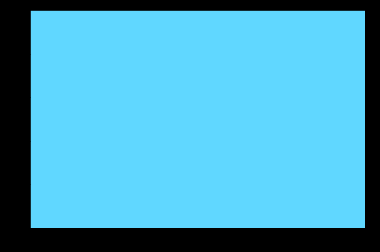

In [4]:
import colorsys
import matplotlib.pyplot as plt

def funcao_de_fitness(rgb):
    hsv = colorsys.rgb_to_hsv(*rgb)
    return hsv[2]

algoritmo_genetico = AlgoritmoGenetico(formato=[[0, 255], [0, 255], [0, 255]], 
                                       funcao_de_fitness=funcao_de_fitness,
                                       minimizar_funcao_de_fitness=False)

rgb = algoritmo_genetico.rodar()
hex_color = '#{0:02x}{1:02x}{2:02x}'.format(*rgb)
fig = plt.figure(facecolor='black')
ax = fig.add_subplot()
ax.set_facecolor(hex_color)
plt.show()